In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [10]:
data_path = 'cell_images/'

In [11]:
os.listdir(data_path)

['test', 'train']

In [12]:
from matplotlib.image import imread

In [13]:
test_path = data_path + 'test/'

In [14]:
train_path = data_path + 'train/'

In [15]:
test_path

'cell_images/test/'

In [16]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [18]:
train_parasitized = train_path+'parasitized/'

In [19]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [21]:
para_img= imread(para_cell)

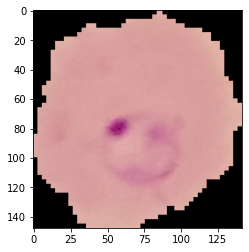

In [79]:
plt.figure(figsize=(4,4))
plt.imshow(para_img);

In [23]:
from glob import glob
import cv2

In [24]:
multipleImages = glob('C:/AI/cell_images/test/parasitized/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

<Figure size 720x720 with 0 Axes>

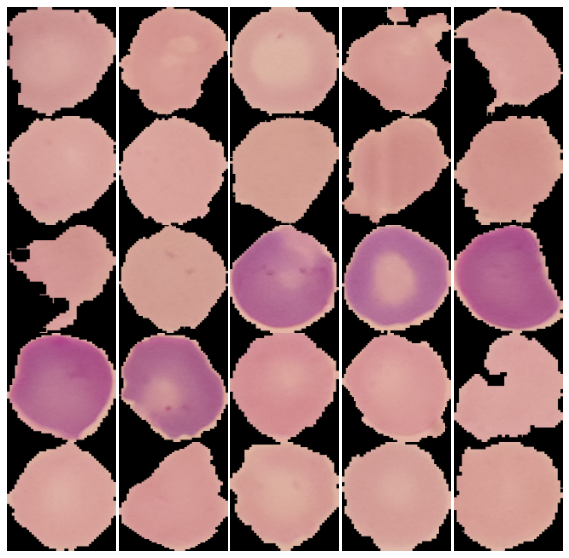

In [26]:
multipleImages = glob('cell_images/test/uninfected/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [27]:
pwd

'C:\\AI\\Github\\CNN on malaria'

In [28]:
len(os.listdir(train_path+'parasitized/'))

12480

In [29]:
len(os.listdir(train_path+'uninfected/'))

12480

In [30]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected/'):
    
    img = imread(test_path+'uninfected/'+image_filename)
    d1,d2,c=img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


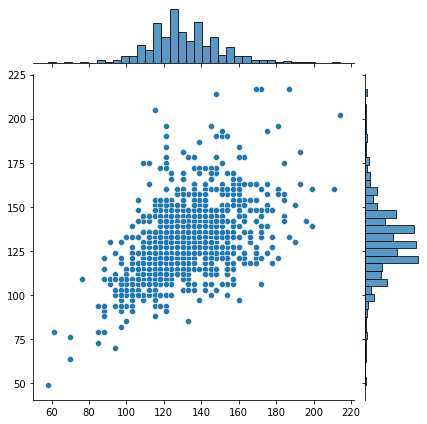

In [31]:
sns.jointplot(dim1,dim2)

In [32]:
np.mean(dim1)

130.92538461538462

In [33]:
np.mean(dim2)

130.75

In [34]:
image_shape = (130, 130, 3)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
image_gen = ImageDataGenerator(rotation_range=90,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.2,
                               shear_range=0.1,
                               rescale=1/255,
                               fill_mode='nearest',
                               horizontal_flip=True,
                               vertical_flip=True)

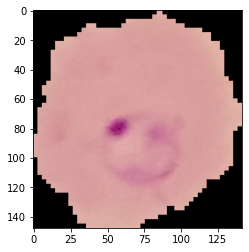

In [77]:
plt.figure(figsize=(4,4))
plt.imshow(para_img)

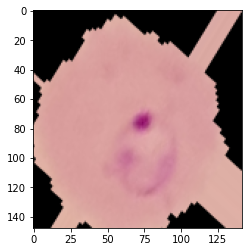

In [76]:
plt.figure(figsize=(4,4))
plt.imshow(image_gen.random_transform(para_img))

In [40]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [41]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [43]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [46]:
batch_size = 16

In [47]:
train_gen = image_gen.flow_from_directory(train_path,
                                         target_size=image_shape[:2],
                                         color_mode='rgb',
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 24958 images belonging to 2 classes.


In [50]:
test_gen = image_gen.flow_from_directory(test_path,
                                         target_size=image_shape[:2],
                                         color_mode='rgb',
                                         batch_size=batch_size,
                                         class_mode='binary',
                                        shuffle=False)

Found 2600 images belonging to 2 classes.


In [51]:
# model.fit(train_gen,epochs=20,validation_data=test_gen,callbacks=[early_stop])

In [52]:
from tensorflow.keras.models import load_model

In [54]:
model = load_model('malaria_detector.h5')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [56]:
model.metrics_names

['loss', 'accuracy']

In [57]:
model.evaluate(test_gen)

163/163 [==============================] - 15s 91ms/step - loss: 0.1641 - accuracy: 0.9454


[0.1641131341457367, 0.9453846216201782]

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_generator(test_gen)

C:\Users\MASADS~1\AppData\Local\Temp/ipykernel_9476/2791045066.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_gen)


In [59]:
pred = predictions > 0.5

In [60]:
len(predictions)

2600

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

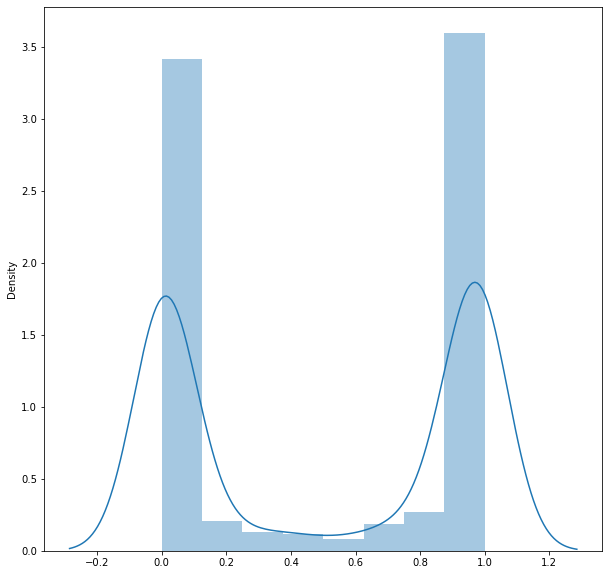

In [61]:
sns.distplot(predictions)

In [62]:
test_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
print(classification_report(test_gen.classes, pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [64]:
con = confusion_matrix(test_gen.classes, pred)

<AxesSubplot:>

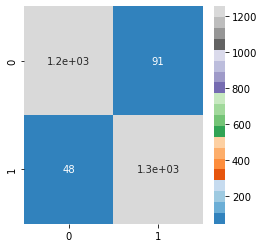

In [75]:
plt.figure(figsize=(4,4))
sns.heatmap(con, annot=True, cmap='tab20c')

In [66]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(para_cell,target_size=image_shape)

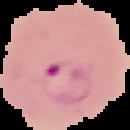

In [67]:
my_image

In [68]:
my_image = image.img_to_array(my_image)

In [69]:
my_image.shape

(130, 130, 3)

In [70]:
my_image = np.expand_dims(my_image, axis=0)

In [71]:
my_image.shape

(1, 130, 130, 3)

In [72]:
model.predict(my_image)

array([[0.]], dtype=float32)